In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gc
import warnings
warnings.filterwarnings('ignore')


In [34]:
def plot_distribution(df, metrics):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics):
        if metric in df.columns:
            axes[i].hist(df[metric], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribution of {metric}')
            axes[i].set_xlabel(metric)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
            
            mean_val = df[metric].mean()
            axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            axes[i].legend()
            
    axes[5].remove()
    plt.tight_layout()
    plt.show()

In [35]:
data = pd.read_csv("all_strategies_all_stocks.csv")
    
metrics = ['Total Return (%)', 'CAGR (%)', 'Sharpe Ratio', 'Max Drawdown (%)', 'Final Value']

mask = (
    (data['Max Drawdown (%)'] <= 1000) &
    (data['Max Drawdown (%)'] >= 0) &
    (data['CAGR (%)'].abs() <= 1000) &
    (data['Sharpe Ratio'].abs() <= 20) &
    (data['Total Return (%)'] >= -100) &
    (data['Final Value'] >= 0) &
    (data["Total Return (%)"] > -100)
)

df = data[mask].copy()
del data
gc.collect()

37128

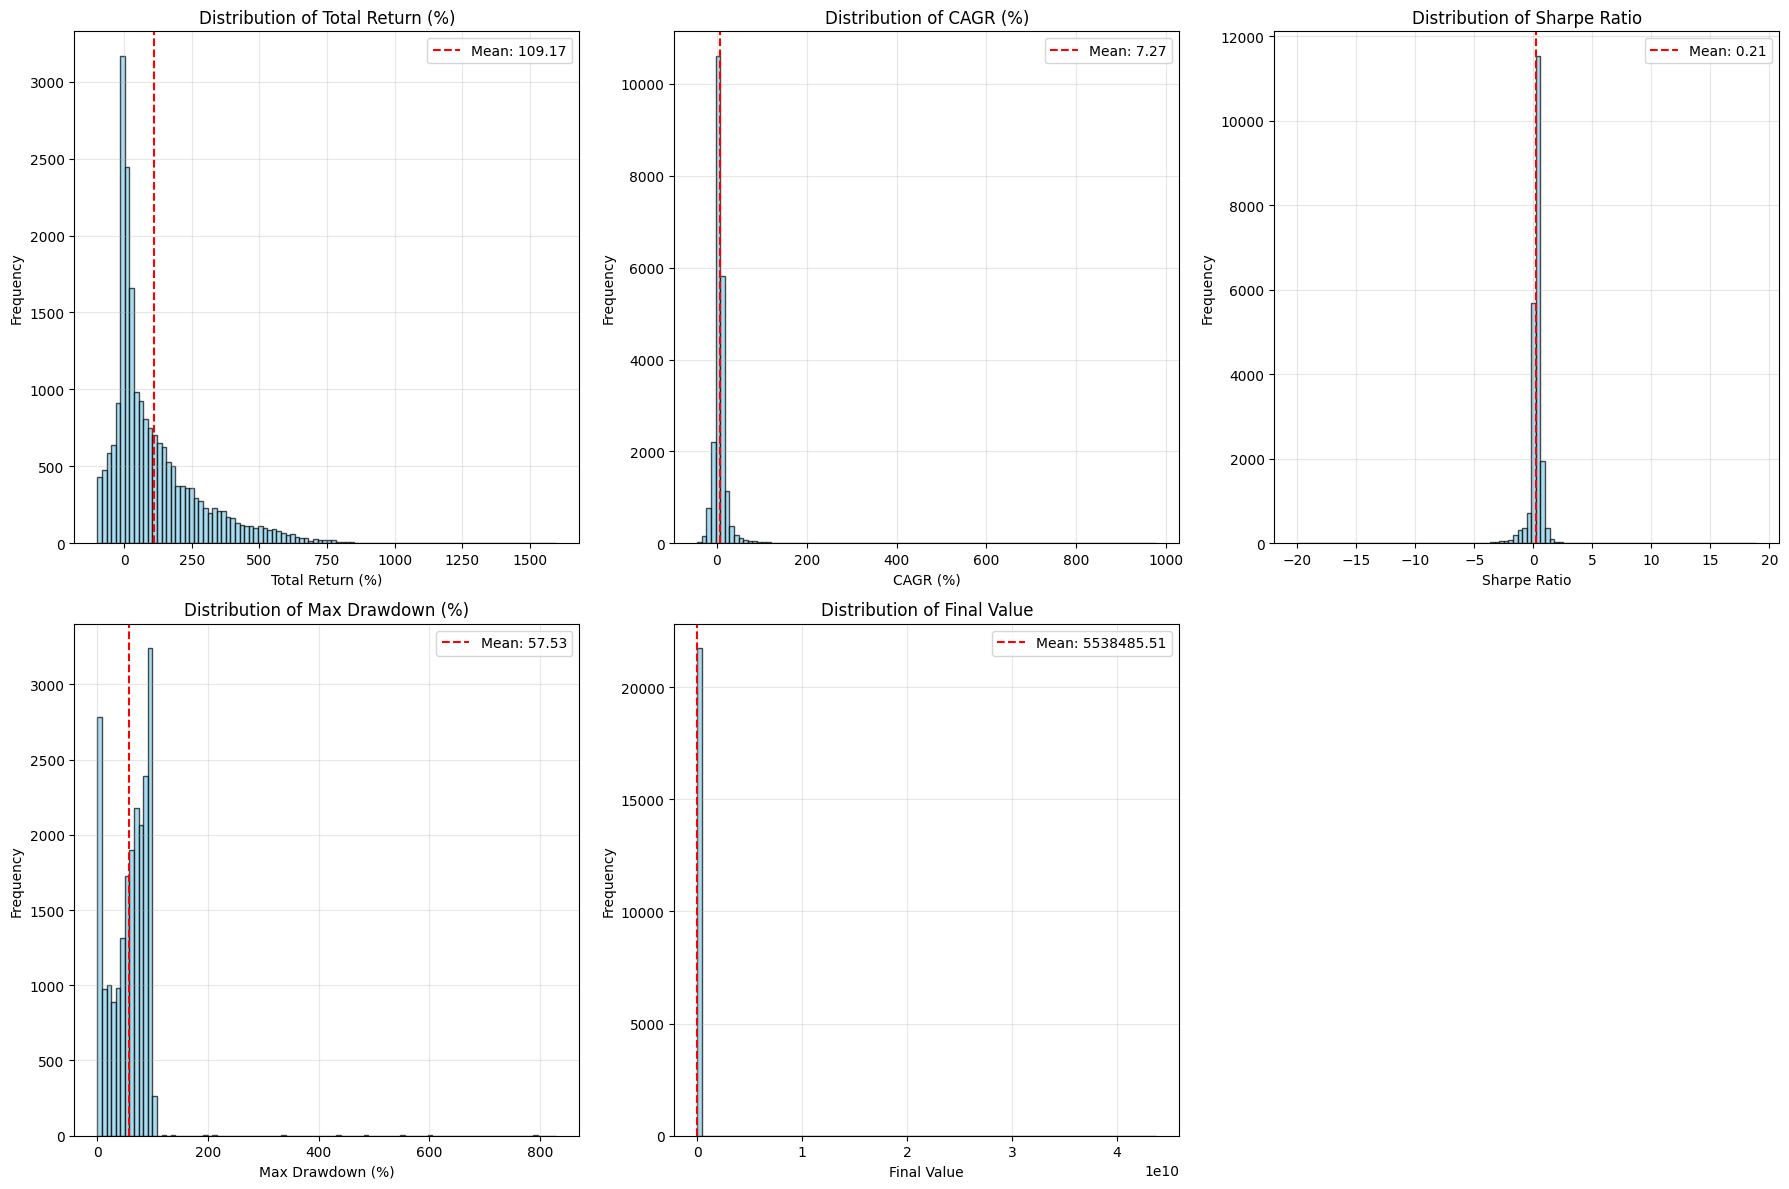

In [36]:
plot_distribution(df=df, metrics=metrics)

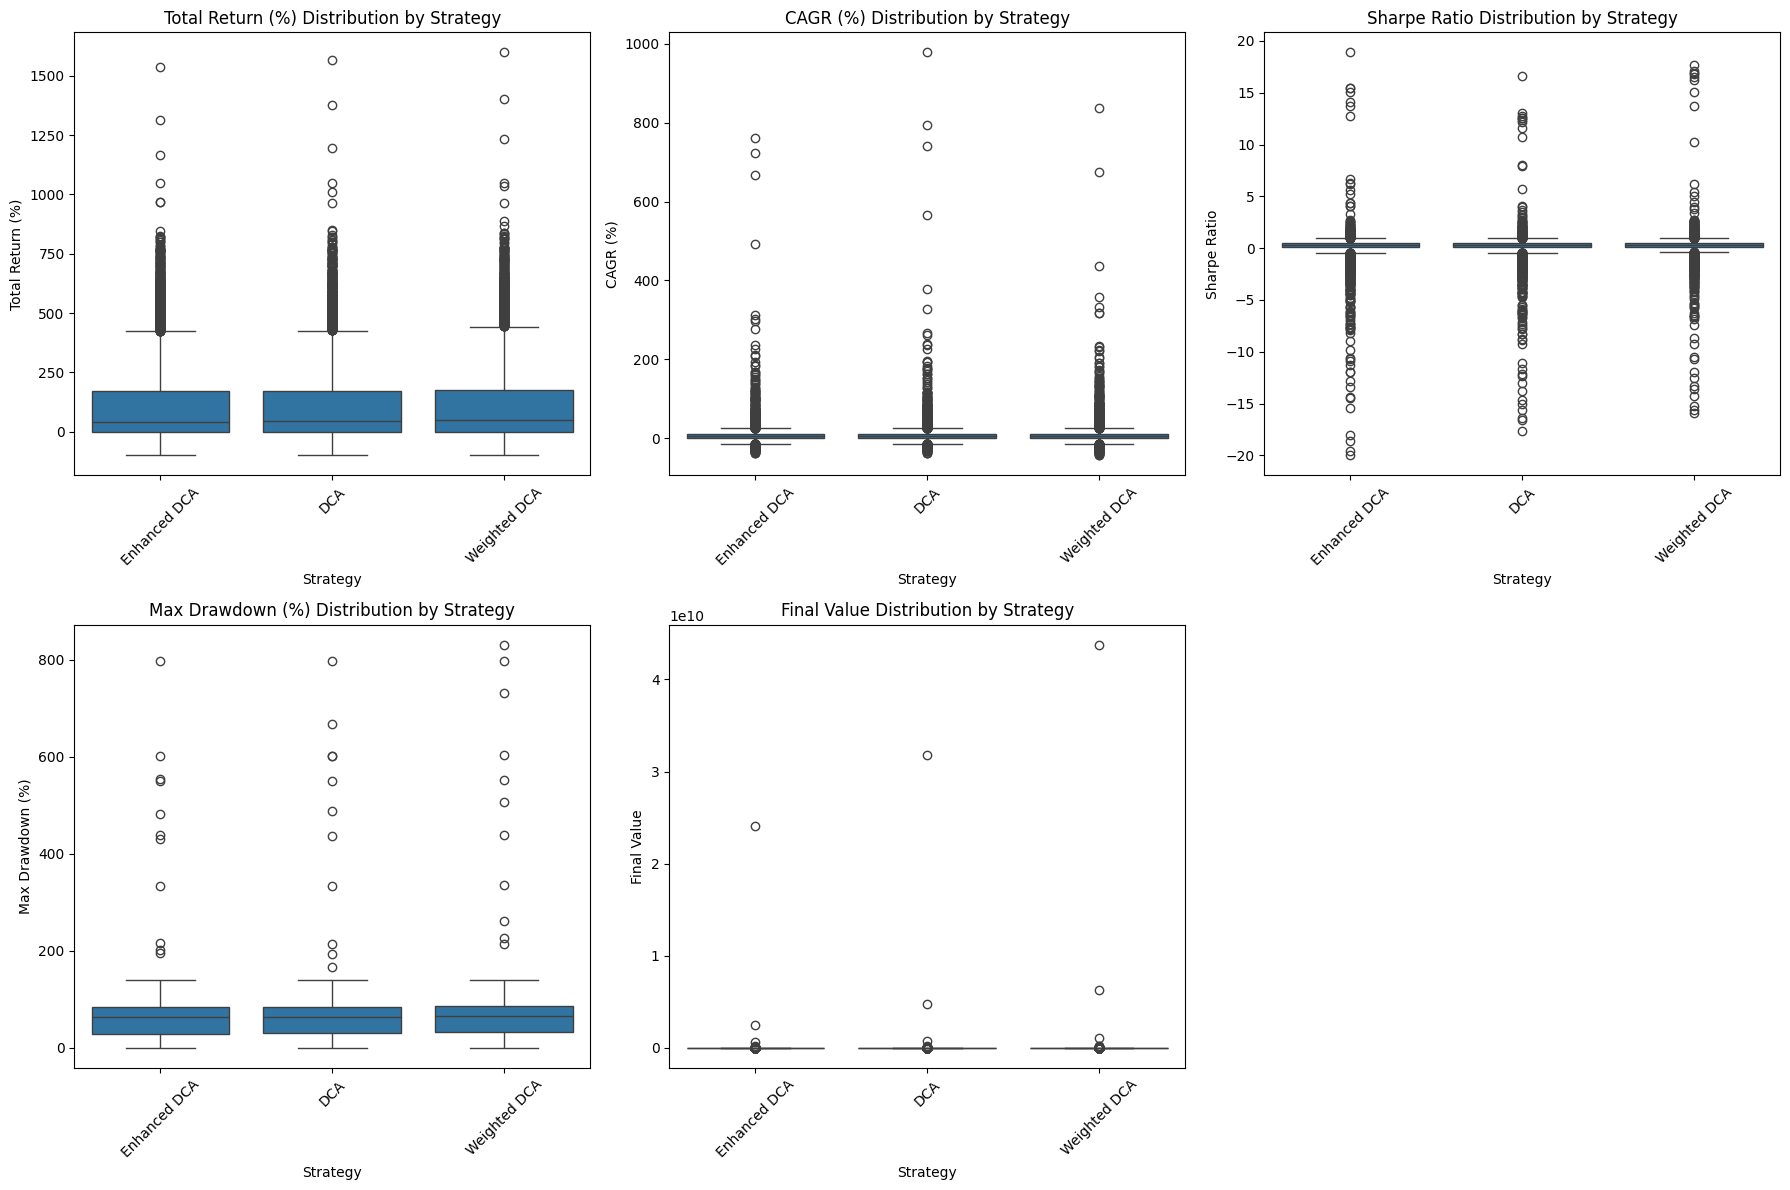

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    if metric in df.columns:
        sns.boxplot(data=df, x='Strategy', y=metric, ax=axes[i])
        axes[i].set_title(f'{metric} Distribution by Strategy')
        axes[i].tick_params(axis='x', rotation=45)

axes[5].remove()
plt.tight_layout()
plt.show()
    

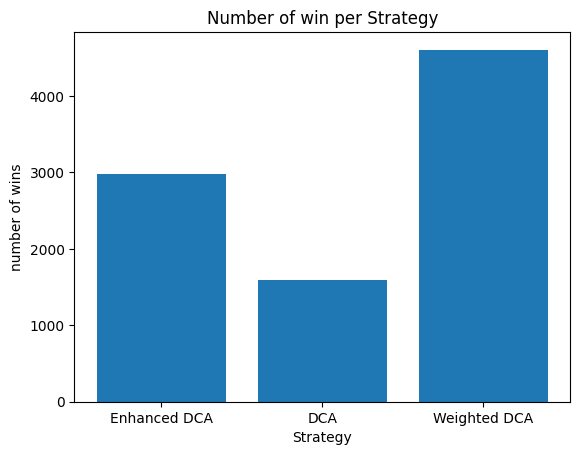

In [ ]:
# Number of win per trade (based on the return)

win_rate = pd.read_csv("strategy_win_rates.csv")
plt.bar(align="center", height=win_rate["Wins"], x=win_rate["Strategy"])
plt.title("Number of win per Strategy")
plt.ylabel("number of wins")
plt.xlabel("Strategy")
plt.show()

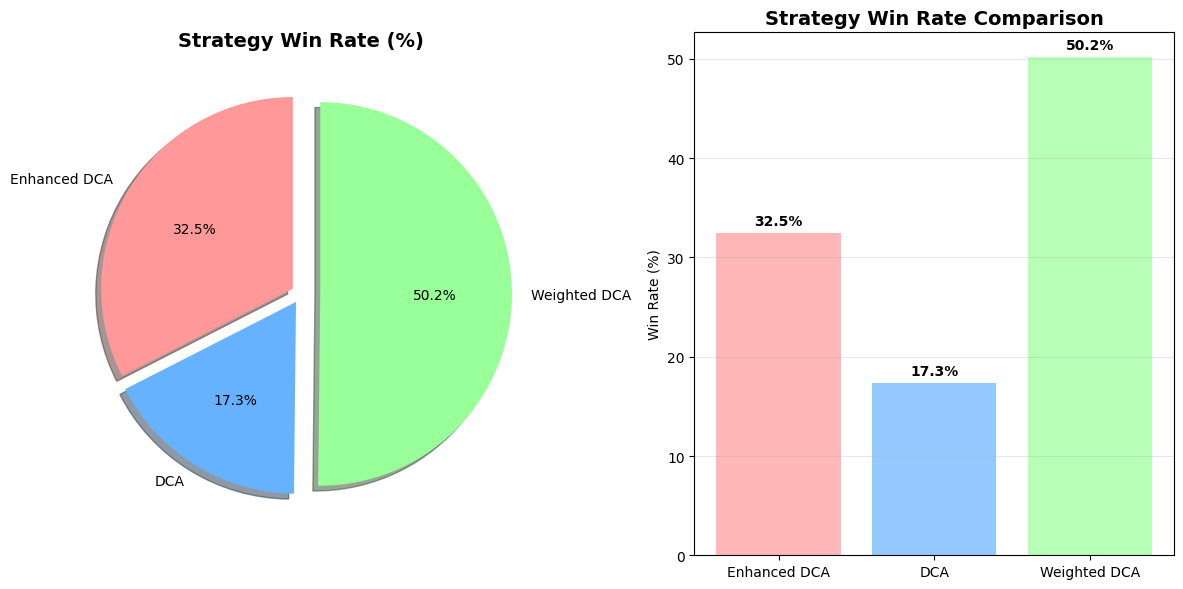

In [51]:
# showing the strategy win rate using pie chart / Bar chart

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

wedges, texts, autotexts = ax1.pie(
    x=win_rate["Win Rate (%)"], 
    labels=win_rate["Strategy"],
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.1 if i == win_rate["Win Rate (%)"].idxmax() else 0.05 for i in range(len(win_rate))],
    shadow=True,
    colors=['#FF9999', '#66B2FF', '#99FF99']
)

ax1.set_title('Strategy Win Rate (%)', fontsize=14, fontweight='bold')

ax2.bar(win_rate["Strategy"], win_rate["Win Rate (%)"], 
        color=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.7)
ax2.set_title('Strategy Win Rate Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Win Rate (%)')
ax2.grid(axis='y', alpha=0.3)

for i, v in enumerate(win_rate["Win Rate (%)"]):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

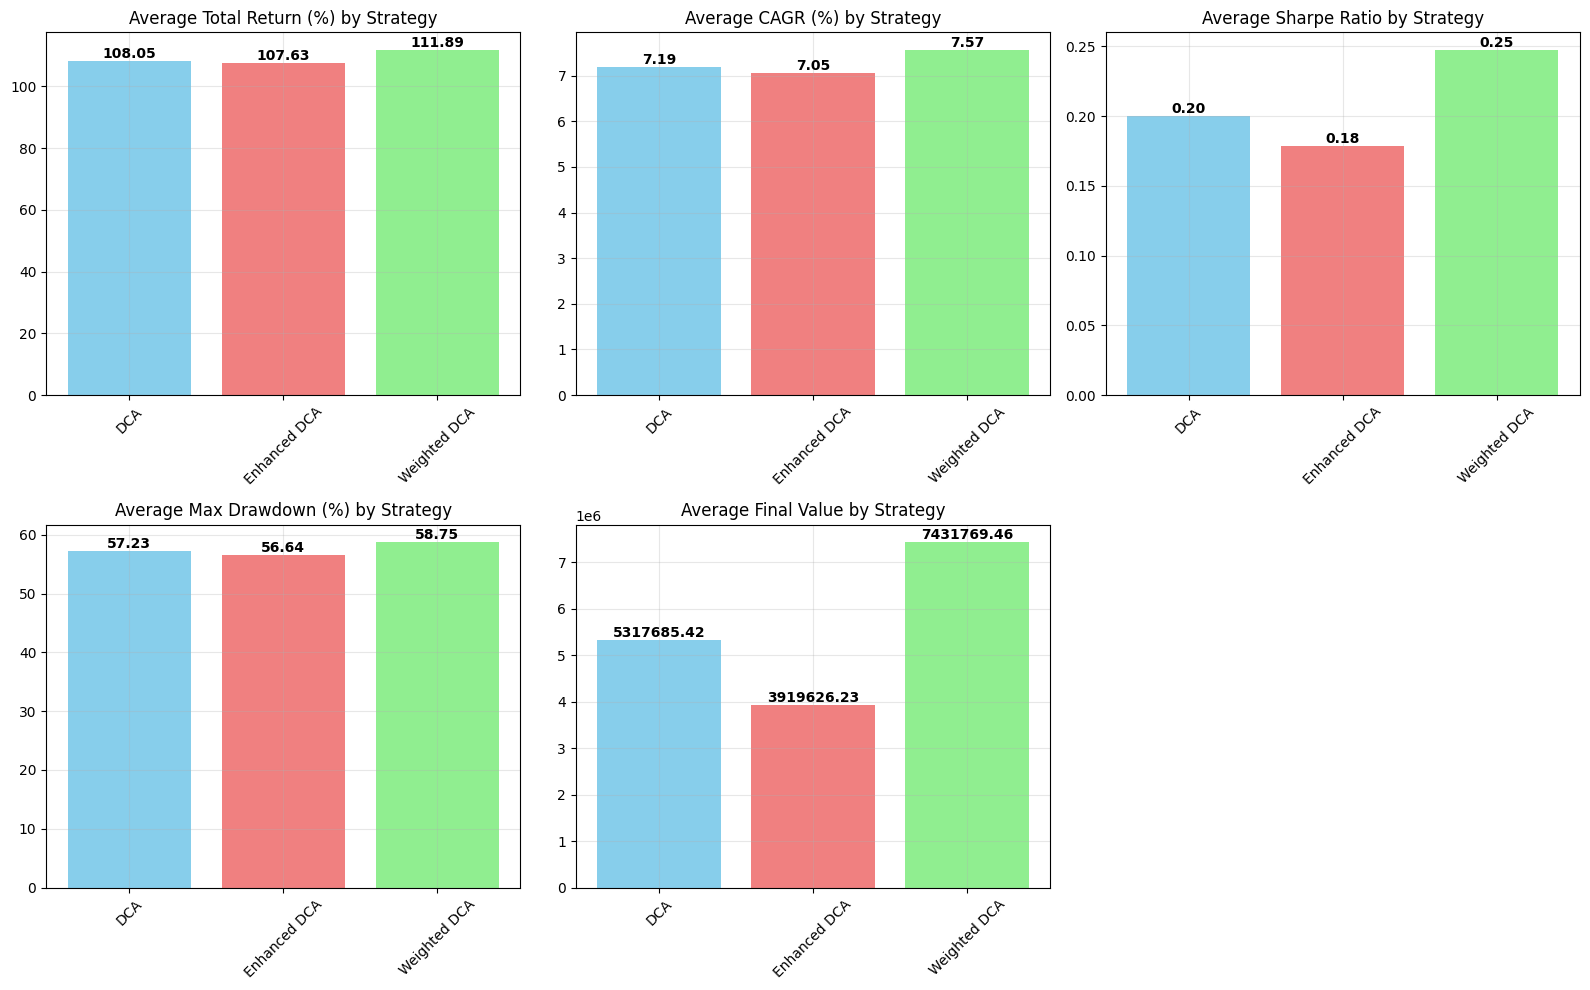

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

metrics = ['Total Return (%)', 'CAGR (%)', 'Sharpe Ratio', 'Max Drawdown (%)', 'Final Value']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, metric in enumerate(metrics):
    strategy_means = df.groupby('Strategy')[metric].mean()
    
    bars = axes[i].bar(strategy_means.index, strategy_means.values, color=colors[:len(strategy_means)])
    axes[i].set_title(f'Average {metric} by Strategy')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)
    
    for bar, value in zip(bars, strategy_means.values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

axes[5].remove()
plt.tight_layout()
plt.show()

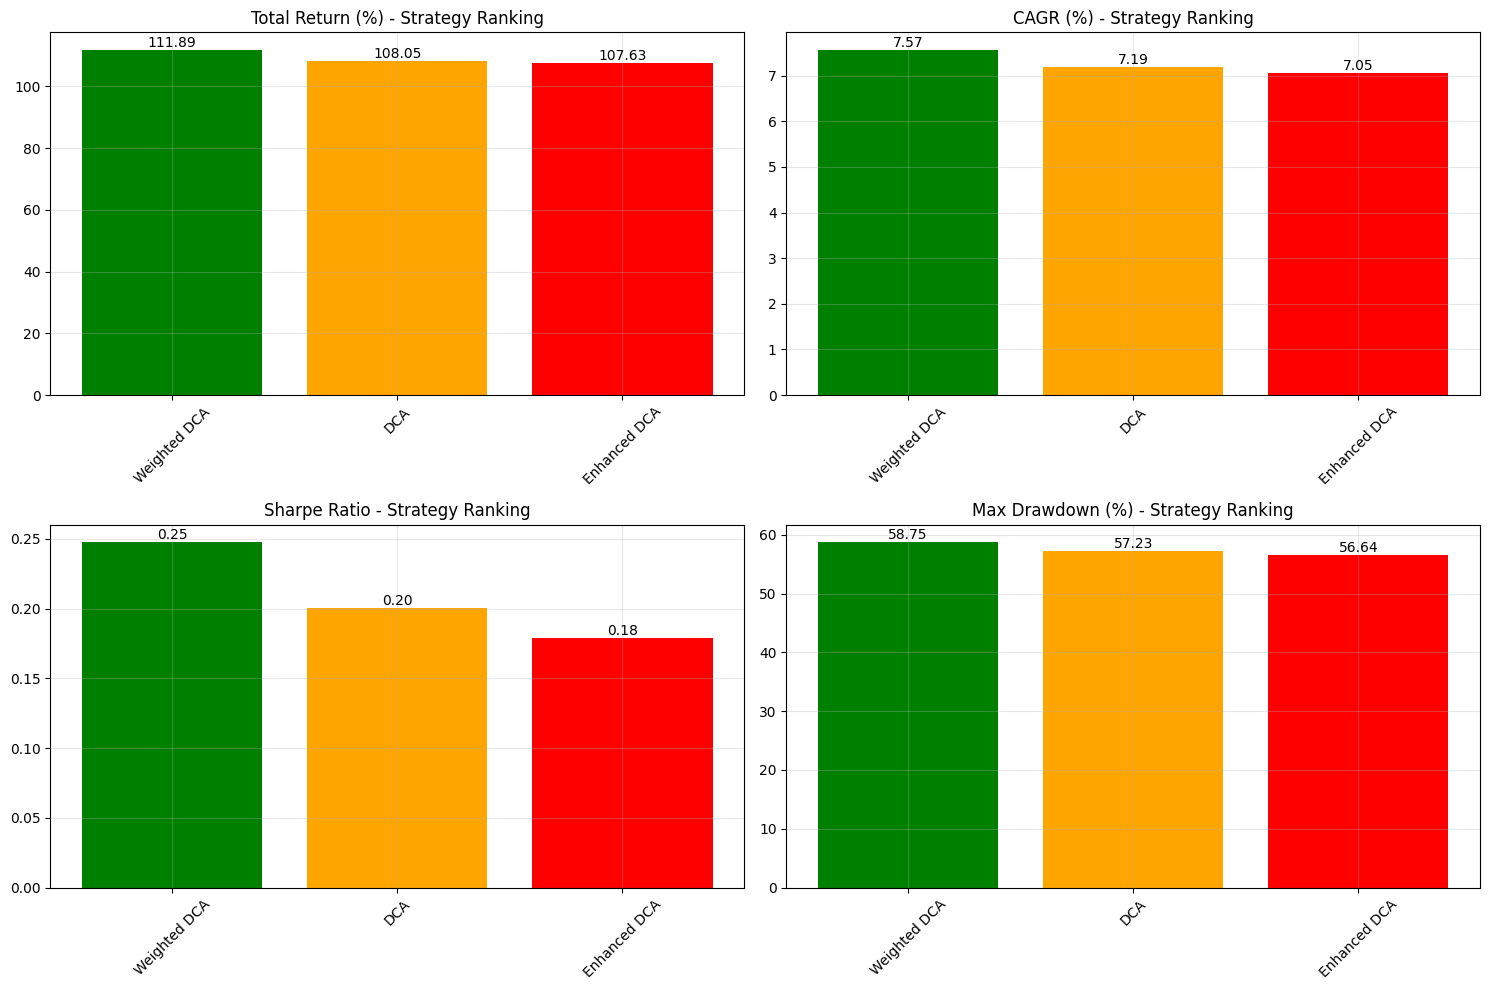

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# average of each strategy analysis

for i, metric in enumerate(['Total Return (%)', 'CAGR (%)', 'Sharpe Ratio', 'Max Drawdown (%)']):
    row, col = i // 2, i % 2
    
    strategy_ranks = df.groupby('Strategy')[metric].mean().sort_values(ascending=False)
    colors_map = ['green' if i == 0 else 'red' if i == len(strategy_ranks)-1 else 'orange' 
                    for i in range(len(strategy_ranks))]
    
    bars = axes[row, col].bar(strategy_ranks.index, strategy_ranks.values, color=colors_map)
    axes[row, col].set_title(f'{metric} - Strategy Ranking')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)
    
    # Adding the number label to the chart
    for bar, value in zip(bars, strategy_ranks.values):
        axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                           f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

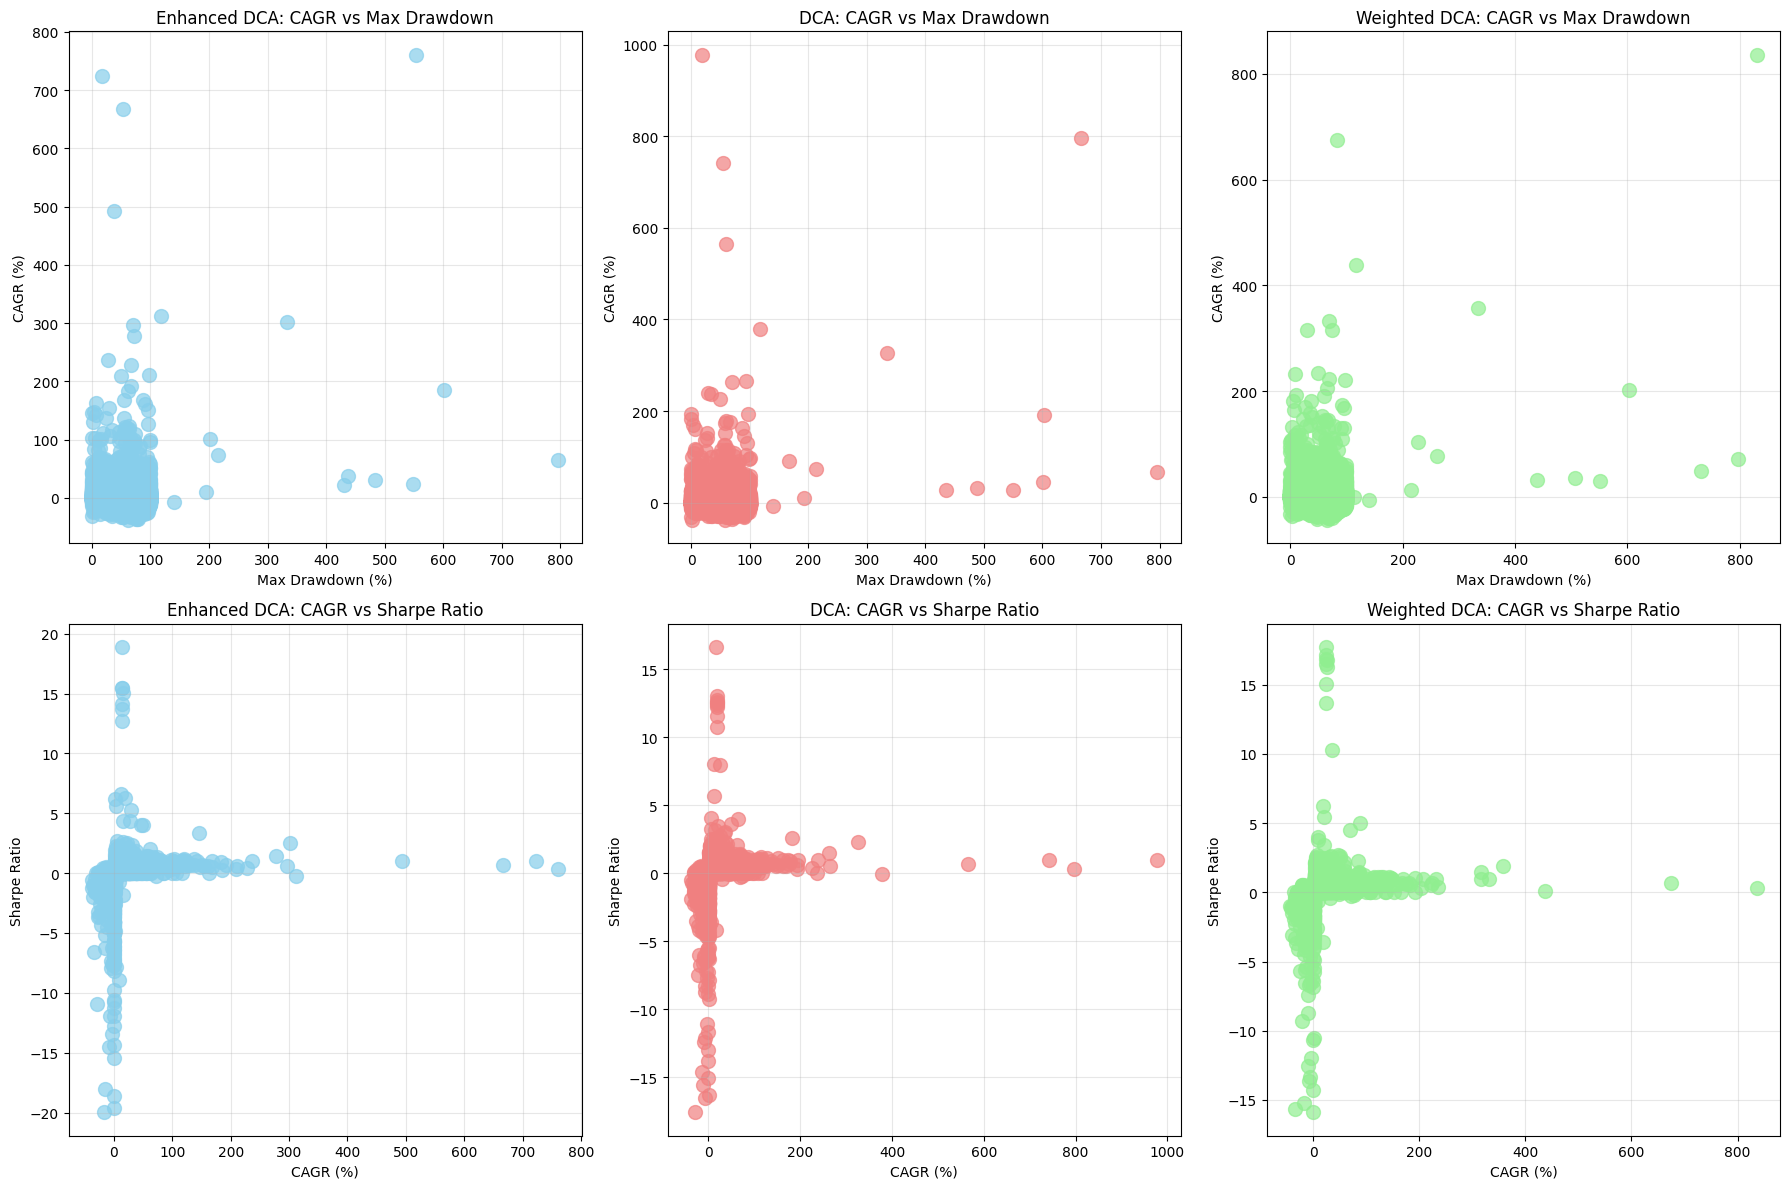

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

strategies = df['Strategy'].unique()

for i, strategy in enumerate(strategies):
    row, col = 0, i
    
    strategy_data = df[df['Strategy'] == strategy]
    
    axes[row, col].scatter(strategy_data['Max Drawdown (%)'], strategy_data['CAGR (%)'], 
                          alpha=0.7, s=100, color=['skyblue', 'lightcoral', 'lightgreen'][i])
    
    axes[row, col].set_xlabel('Max Drawdown (%)')
    axes[row, col].set_ylabel('CAGR (%)')
    axes[row, col].set_title(f'{strategy}: CAGR vs Max Drawdown')
    axes[row, col].grid(True, alpha=0.3)
    
for i, strategy in enumerate(strategies):
    row, col = 1, i
    
    strategy_data = df[df['Strategy'] == strategy]
    
    axes[row, col].scatter(strategy_data['CAGR (%)'], strategy_data['Sharpe Ratio'], 
                          alpha=0.7, s=100, color=['skyblue', 'lightcoral', 'lightgreen'][i])
    
    axes[row, col].set_xlabel('CAGR (%)')
    axes[row, col].set_ylabel('Sharpe Ratio')
    axes[row, col].set_title(f'{strategy}: CAGR vs Sharpe Ratio')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()